# Homework 2
Dravin Flores

---

### Exercise 1

a. Were an object to only experience one force, then this means such force is the net force, and according to Newtonian mechanics, net forces impart onto the object a certain acceleration.

b. Assuming that we're throwing a ball on the surface of the Earth, we know that there is a constant force imparted upon falling objects proportional to the object's mass. This means that even though at a certain time, the object has reached a velocity of 0, it will continue to accelerate toward the center of the earth at a constant rate.

c. Assuming that the elevator is not accelerating, then we will still be able to measure the acceleration due to gravity somewhere on the order of $9.8 \frac{\text{m}}{\text{s}}$ given that, in classical mechanics, forces ought to be irrespective of a particular inertial reference frame.

d. Given that gravity is accelerating this ball downward, then in a vacuum the ball will have an acceleration equal to this constant acceleration. Seeing as air resistance acts opposing the motion of the ball, it will attempt to impart a velocity opposite the direction of motion. This means that the vector sum of the velocity will be less than in a vacuum.

### Exercise 6

In [4]:
# Import a whole bunch of stuff
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

In [5]:
# Length of time interval.
tf = 4

# Step size
dt = 0.001

# Arrays to store the data. It should be noted that these arrays have 4000 elements.
t = np.arange(0.00, tf, dt)
p = np.zeros((len(t), 2))

# Define our initial condition
p[0] = [2.00, 1.00]

In [9]:
print(f"p[0] = {p[0]}")
print(f"p[3999] = {p[3999]}")

p[0] = [2. 1.]
p[3999] = [0. 0.]


In [10]:
print(f"p[0][0] = {p[0][0]}")
print(f"p[3999][1] = {p[3999][1]}")

p[0][0] = 2.0
p[3999][1] = 0.0


In [13]:
n = int(tf/dt)

for i in range(1, n):
    p[i] = [i, 2*i]
    
c = 0

for i in range(0, n):
    if not i:
        if p[i][0] != 2.0:
            c += 1
        elif p[i][1] != 1.0:
            c += 1
    else:
        if p[i][0] != 1.0*i:
            c += 1
        elif p[i][1] != 2.0*i:
            c += 1
            
if not c:
    print("Success!")
else:
    print("There is an error somewhere here.")

Success!


In [14]:
# Final time
tf = 2.04

# Difference in time steps
dt = 0.1

t = np.arange(0, tf, dt)
theta_deg = 45
theta_rad = np.radians(theta_deg)

x = 10*t * np.cos(theta_rad)
y = 10*t * np.sin(theta_rad)
z = 10*t - (9.81/2) * t**2

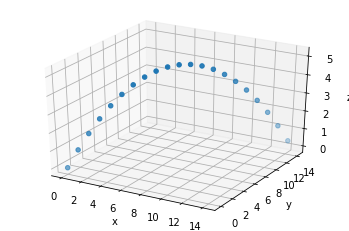

In [22]:
# Plots
fig = plt.axes(projection='3d')
fig.set_xlabel('x')
fig.set_ylabel('y')
fig.set_zlabel('z')
fig.scatter(x, y, z)

a. Express $x(t)$, $y(t)$, and $z(t)$ as a single vector $\boldsymbol{r}(t)$

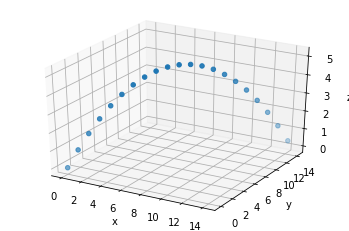

In [24]:
# We need to use an array to store our vector.
r = np.array([x, y, z])

# Plot our data.
fig = plt.axes(projection='3d')
fig.set_xlabel('x')
fig.set_ylabel('y')
fig.set_zlabel('z')
fig.scatter(r[0], r[1], r[2])

b. The benefits from expressing our equations as an array/vector come from the idea that we express rates and quantities with multiple elements as vectors; as our code helps us model real world phenomenon, we ought to express our code in a way similar to how we express our mathematics. As well, there is a real sense of modularity with expressing our rates and quantities as vectors, as not only can we group all the connected data into one data structure, we also have a *standard* method of interacting with our data, not too dissimilar from a programming API.

In [25]:
# Print the maximum our data elements.
x_max = np.max(r[0])
y_max = np.max(r[1])
z_max = np.max(r[2])

print(f"x_max = {x_max}")
print(f"y_max = {y_max}")
print(f"z_max = {z_max}")

x_max = 14.142135623730951
y_max = 14.14213562373095
z_max = 5.095


6c. 
$$
\boldsymbol{r} = \left(v_0 \cos{\theta}, 0, v_0 \sin{\theta} \cdot t - \frac{1}{2} g t^2\right)
$$

$$
t_f = 2 \cdot \frac{V_0 \sin{\theta}}{g}
$$

In [33]:
def plot_stuff(x, y, z):
    fig = plt.axes(projection='3d')
    fig.set_xlabel('x')
    fig.set_ylabel('y')
    fig.set_zlabel('z')
    fig.scatter(x, y, z)

# Input an initial velocity and an initial angle theta
def analyze_golfball(initial_velocity, theta, dt=0.001):
    g = 9.8
    vi = initial_velocity
    th = (np.pi * theta) / 180
    
    # Defining how many data points to extrapolate from.
    # dt = 0.001
    tf = 2 * vi * np.sin(th) / g
    n = int(tf/dt)
    
    t = np.arange(0, tf, dt)
    r = np.zeros((3, t.size))
    
    for row in range(3):
        for col in range(n):
            if row == 0:
                r[row][col] = vi * np.cos(th) * t[col]
            elif row == 1:
                r[row][col] = 0.00
            else:
                r[row][col] = (vi * np.sin(th) * t[col]) - (0.50 * g * t[col]**2)
    
    x_max = np.max(r[0])
    y_max = np.max(r[1])
    z_max = np.max(r[2])                                                
    plot_stuff(r[0], r[1], r[2])
    return (x_max, y_max, z_max)

x_max = 715.6660731793845
y_max = 0.0
z_max = 103.31632639999995


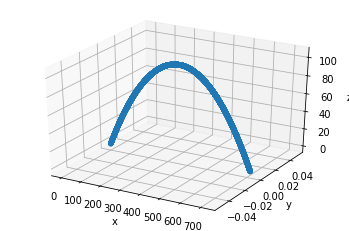

In [44]:
# 6d
(x, y, z) = analyze_golfball(90, 30)
print(f"x_max = {x}")
print(f"y_max = {y}")
print(f"z_max = {z}")

x_max = 206.574175055838
y_max = 0.0
z_max = 51.65816323307237


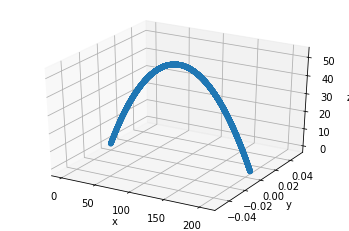

In [45]:
# 6e
(x, y, z) = analyze_golfball(45, 45)
print(f"x_max = {x}")
print(f"y_max = {y}")
print(f"z_max = {z}")